# Dickey Fuller Test for stationarity 

In [1]:
# Normal imports of the library # 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
# ignore the unwanted warnings #
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# have similar plot size #
from pylab import rcParams
rcParams['figure.figsize']=12,5

In [5]:
# import the dataset #
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.index.freq = 'MS'

In [6]:
female = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
female.index.freq = 'D'

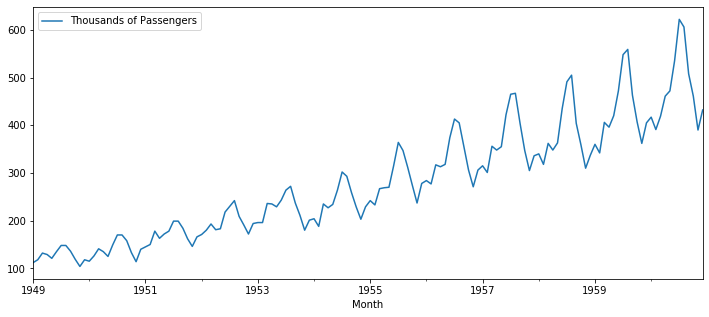

In [7]:
airline.plot()

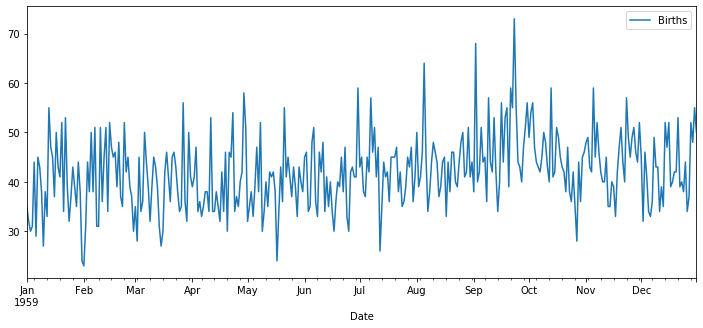

In [8]:
female.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
adfuller(airline['Thousands of Passengers'])

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [11]:
adfuller(female['Births'])

(-4.808291253559763,
 5.243412990149865e-05,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 2343.8290926464197)

In [12]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

In [63]:
# create a convenience function for dickey fuller test of stationarity #

def dickey_fuller(series,title='Your Dataset'):
    from statsmodels.tsa.stattools import adfuller
    
    print(f'Welcome to the magical Dickey Fuller Test of {title}\n')
    result = adfuller(series.dropna(),autolag='AIC')
    
    df = pd.Series(result[0:4],index=['test-statistics','p-Value','#lags','#obs'])
    
    print (df.to_string())
    
    for key,value in result[4].items():
        print (f'critical {key} value is {value}')
               
                 
    if result[1] < 0.05:
        print ('There is sufficient evidence against the Null Hypothesis')
        print ('We reject the Null Hypothesis')
        print ('Conclusion: The provided dataset is stationary')
    else:
        print ('There is not sufficient evidence against the Null Hypothesis')
        print ('We fail to reject the Null Hypothesis')
        print ('Conclusion: The provided dataset is non-stationary')
    


In [64]:
dickey_fuller(airline['Thousands of Passengers'],title='Airline Passenger Dataset')

Welcome to the magical Dickey Fuller Test of Airline Passenger Dataset

test-statistics      0.815369
p-Value              0.991880
#lags               13.000000
#obs               130.000000
critical 1% value is -3.4816817173418295
critical 5% value is -2.8840418343195267
critical 10% value is -2.578770059171598
There is not sufficient evidence against the Null Hypothesis
We fail to reject the Null Hypothesis
Conclusion: The provided dataset is non-stationary


- The Airline dataset is Non Stationary



In [61]:
dickey_fuller(female['Births'],title='Daily Female Birth Dataset')

Welcome to the magical Dickey Fuller Test of Daily Female Birth Dataset

test-statistics     -4.808291
p-Value              0.000052
#lags                6.000000
#obs               358.000000
critical 1% value is -3.448748905151901
critical 5% value is -2.8696473721448728
critical 10% value is -2.5710891239349585
There is sufficient evidence against the Null Hypothesis
We reject the Null Hypothesis


Conclusion: The provided dataset is stationary


- The Daily female birth dataset is Stationary

In [62]:
from statsmodels.tsa.stattools import grangercausalitytests

In [52]:
help(grangercausalitytests)

Help on function grangercausalitytests in module statsmodels.tsa.stattools:

grangercausalitytests(x, maxlag, addconst=True, verbose=True)
    Four tests for granger non causality of 2 time series.
    
    All four tests give similar results. `params_ftest` and `ssr_ftest` are
    equivalent based on F test which is identical to lmtest:grangertest in R.
    
    Parameters
    ----------
    x : array_like
        The data for test whether the time series in the second column Granger
        causes the time series in the first column. Missing values are not
        supported.
    maxlag : {int, Iterable[int]}
        If an integer, computes the test for all lags up to maxlag. If an
        iterable, computes the tests only for the lags in maxlag.
    addconst : bool
        Include a constant in the model.
    verbose : bool
        Print results.
    
    Returns
    -------
    dict
        All test results, dictionary keys are the number of lags. For each
        lag the values are

# Granger Causality Test 

In [67]:
from statsmodels.tsa.stattools import grangercausalitytests

In [68]:
samples = pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)

In [69]:
samples.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


In [70]:
samples.index.freq = 'MS'

In [71]:
samples.dropna(inplace=True)

In [73]:
grangercausalitytests(samples[['a','b']],maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.9140  , p=0.1665  , df=1
likelihood ratio test: chi2=1.8988  , p=0.1682  , df=1
parameter F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=4.1192  , p=0.1275  , df=2
likelihood ratio test: chi2=4.0489  , p=0.1321  , df=2
parameter F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=3.7580  , p=0.2888  , df=3
likelihood ratio test: chi2=3.6989  , p=0.2959  , df=3
parameter F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3


{1: ({'ssr_ftest': (1.8657446915203728, 0.17460567618558112, 116.0, 1),
   'ssr_chi2test': (1.91399670940452, 0.16651997275602917, 1),
   'lrtest': (1.8987674237599776, 0.16821634843177782, 1),
   'params_ftest': (1.8657446915203282, 0.17460567618558553, 116.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.9723159552740523, 0.14389496595539294, 113.0, 2),
   'ssr_chi2test': (4.1191731455281095, 0.1275066737311546, 2),
   'lrtest': (4.048907159986356, 0.13206598697313415, 2),
   'params_ftest': (1.9723159552739657, 0.14389496595540535, 113.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.1777316658326, 0.3216263195112831, 110.0, 3),
   'ssr_chi2test': (3.7580346791567507, 0.2888052806926772, 3),
   'lrtest': (3.698942750946003, 0.2958616254803675, 3),
   'params_ftest': (1.177731665832607, 0.32162631951127824, 110.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

# Exposing seasonality with month and quarter plots 

In [74]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

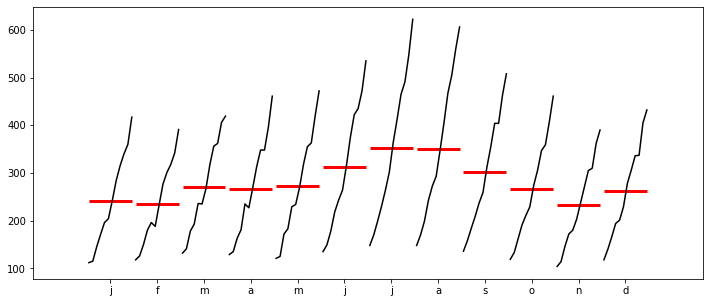

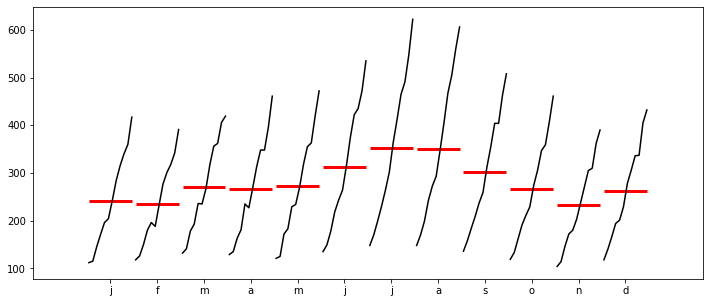

In [75]:
month_plot(airline['Thousands of Passengers'])

In [ ]:
quarter_plot(airline['Thousands of Passengers'].resample())